<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Deep_Learning/blob/main/Training_Neural_Network_With__Backpropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will start with this NEURAL NETWORK:
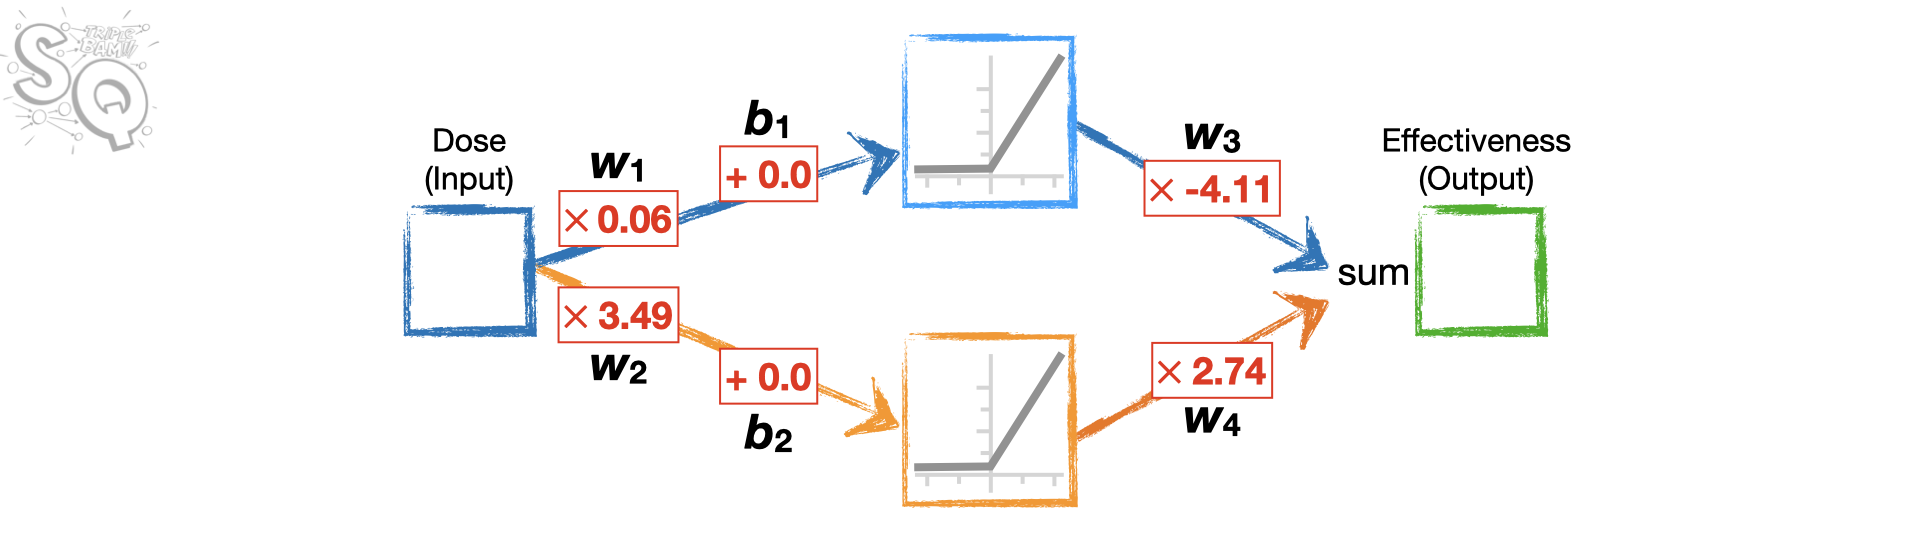

And hopefully, reach this NN to correctly predict the values:
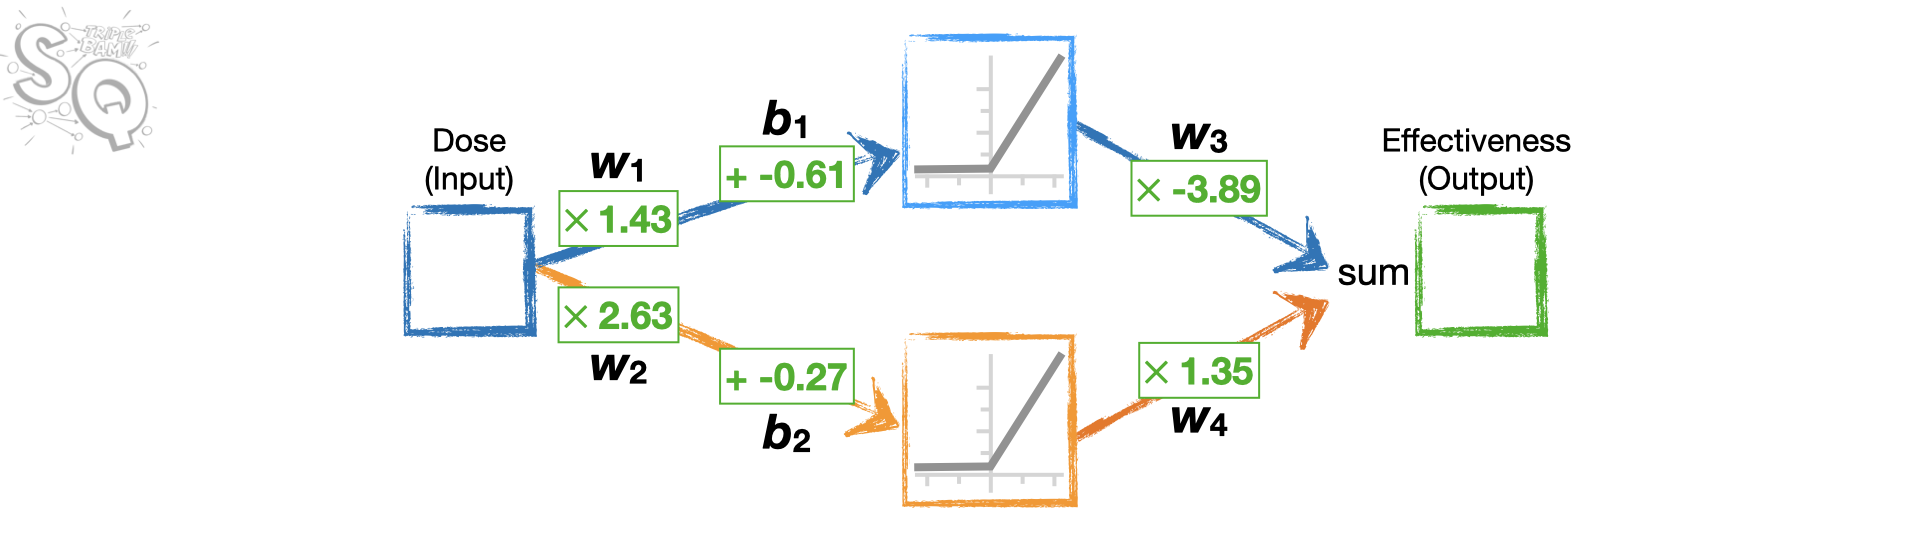

In [1]:
!pip install lightning seaborn > /dev/null

In [39]:
import torch            # for tensors and helper functions
import torch.nn as nn   # gives nn module for neural netoworks
import torch.nn.functional as F  # this givs us ReLU()
from torch.optim import SGD   # Stochastic gradient descent but we will pass all the data so it will act like normal gradient descent!

import lightning as L           # Lightning makes it easier to write, optimize and scale our code
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
training_inputs = torch.tensor([0,0.5,1])

In [41]:
training_labels = torch.tensor([0,1,0])

In [42]:
training_dataset = TensorDataset(training_inputs,training_labels)

In [43]:
dataloader = DataLoader(training_dataset)

In [44]:
class myNN(L.LightningModule):

  def __init__(self):

    super().__init__()

    self.w1 = nn.Parameter(torch.tensor(0.06))
    self.b1 = nn.Parameter(torch.tensor(0.0))

    self.w2 = nn.Parameter(torch.tensor(3.49))
    self.b2 = nn.Parameter(torch.tensor(0.0))

    self.w3 = nn.Parameter(torch.tensor(-4.11))
    self.w4 = nn.Parameter(torch.tensor(2.74))

    self.loss = nn.MSELoss(reduction='sum')


  def forward(self, input_values):

    top_x_axis_values = (input_values * self.w1) + self.b1
    bottom_x_axis_values = (input_values * self.w2) + self.b2

    top_y_axis_values = F.relu(top_x_axis_values)
    bottom_y_axis_values = F.relu(bottom_x_axis_values)

    output_values = (top_y_axis_values * self.w3) + (bottom_y_axis_values * self.w4)

    return output_values

  def configure_optimizers(self):

    return SGD(self.parameters(), lr=0.01)

  def training_step(self, batch, batch_index):
    inputs, labels = batch
    labels = labels.float()
    outputs = self.forward(inputs)
    loss = self.loss(outputs, labels)

    return loss

In [45]:
model = myNN()

In [46]:
for name, param in model.named_parameters():
    print(name, torch.round(param.data, decimals=2))

w1 tensor(0.0600)
b1 tensor(0.)
w2 tensor(3.4900)
b2 tensor(0.)
w3 tensor(-4.1100)
w4 tensor(2.7400)


In [47]:
output_values = model(training_inputs)
torch.round(output_values, decimals=2)

tensor([0.0000, 4.6600, 9.3200], grad_fn=<RoundBackward1>)

In [48]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [49]:
output_values = model(input_doses)
output_values

tensor([0.0000, 0.9316, 1.8632, 2.7948, 3.7264, 4.6580, 5.5896, 6.5212, 7.4528,
        8.3844, 9.3160], grad_fn=<AddBackward0>)

Text(0.5, 1.0, 'Effectiveness vs. Doses')

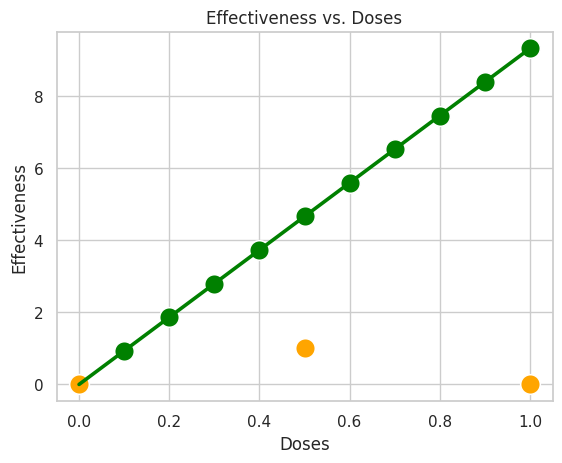

In [50]:
sns.set(style = 'whitegrid')

sns.scatterplot(x = input_doses,
                y = output_values.detach().numpy(),
                color='green',
                s=200)

sns.lineplot(x = input_doses,
             y = output_values.detach().numpy(),
             color = 'green',
             linewidth=2.6)

sns.scatterplot(x = training_inputs,
                y = training_labels,
                color = 'orange',
                s = 200)

plt.ylabel("Effectiveness")
plt.xlabel("Doses")
plt.title("Effectiveness vs. Doses")

## Training the Weights and Biases in the Neural Network

In [54]:
model2 = myNN()

In [55]:
trainer = L.Trainer(max_epochs = 500,
                    logger = False,
                    enable_checkpointing=False,
                    enable_progress_bar=False)
trainer.fit(model2, train_dataloaders=dataloader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | loss         | MSELoss | 0      | train
  | other params | n/a     | 6      | n/a  
-------------------------------------------------
6         Trainable params
0         Non-trainable params
6         Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | loss         | MSELoss | 0      | train
  | other par

In [56]:
for name, param in model2.named_parameters():
    print(name, torch.round(param.data, decimals=3))

w1 tensor(1.4790)
b1 tensor(-0.5680)
w2 tensor(2.6980)
b2 tensor(-0.2580)
w3 tensor(-4.2400)
w4 tensor(1.5840)


In [57]:
output_values = model2(input_doses)
torch.round(output_values, decimals=2)

tensor([0.0000, 0.0200, 0.4500, 0.8700, 1.2000, 1.0000, 0.8000, 0.6000, 0.4000,
        0.2000, 0.0000], grad_fn=<RoundBackward1>)

Text(0.5, 0, 'Dose')

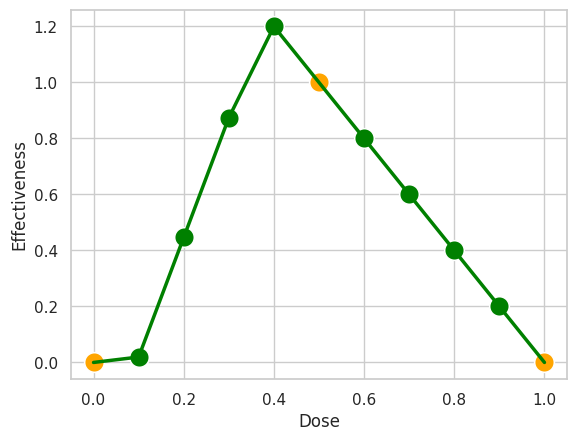

In [58]:
sns.set(style="whitegrid")

sns.scatterplot(x=input_doses,
                y=output_values.detach().numpy(),
                color='green',
                s=200)

sns.lineplot(x=input_doses,
             y=output_values.detach().numpy(),
             color='green',
             linewidth=2.5)

sns.scatterplot(x=training_inputs,
                y=training_labels,
                color='orange',
                s=200)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')